In [18]:
# Auxiliary Libraries
import numpy as np
import pandas as pd
import itertools
import umap
import random
from tqdm import tqdm

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Dataset
from sklearn.datasets import load_iris

# Import my own methods
from distances import distance, sort_distances
from plotting import immersive_scatter, scatter_clusters, scatter, heatmap, surface, scatter_to_surface
from clusters import grid, boxes, box_clusters, neighbors, similarity_index, intra_cluster_indices, extra_cluster_indices
from auxiliary import normalize, read, one_hot_encoding
from main import main
from mountain_clustering import MountainClustering
from subtractive_clustering import SubtractiveClustering
from kmeans_clustering import KMeansClustering
from fuzzycmeans_clustering import FuzzyCMeansClustering
from spectral_clustering import SpectralClustering

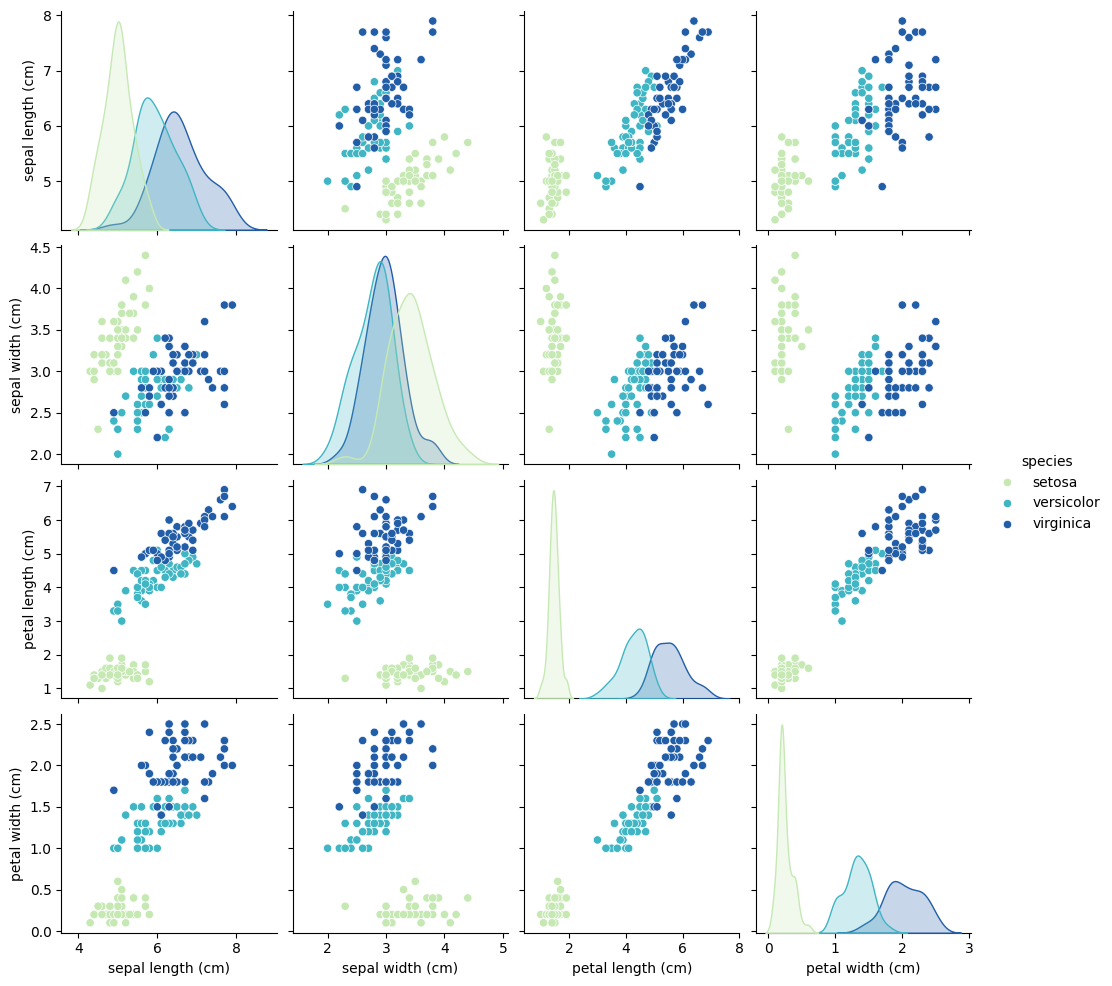

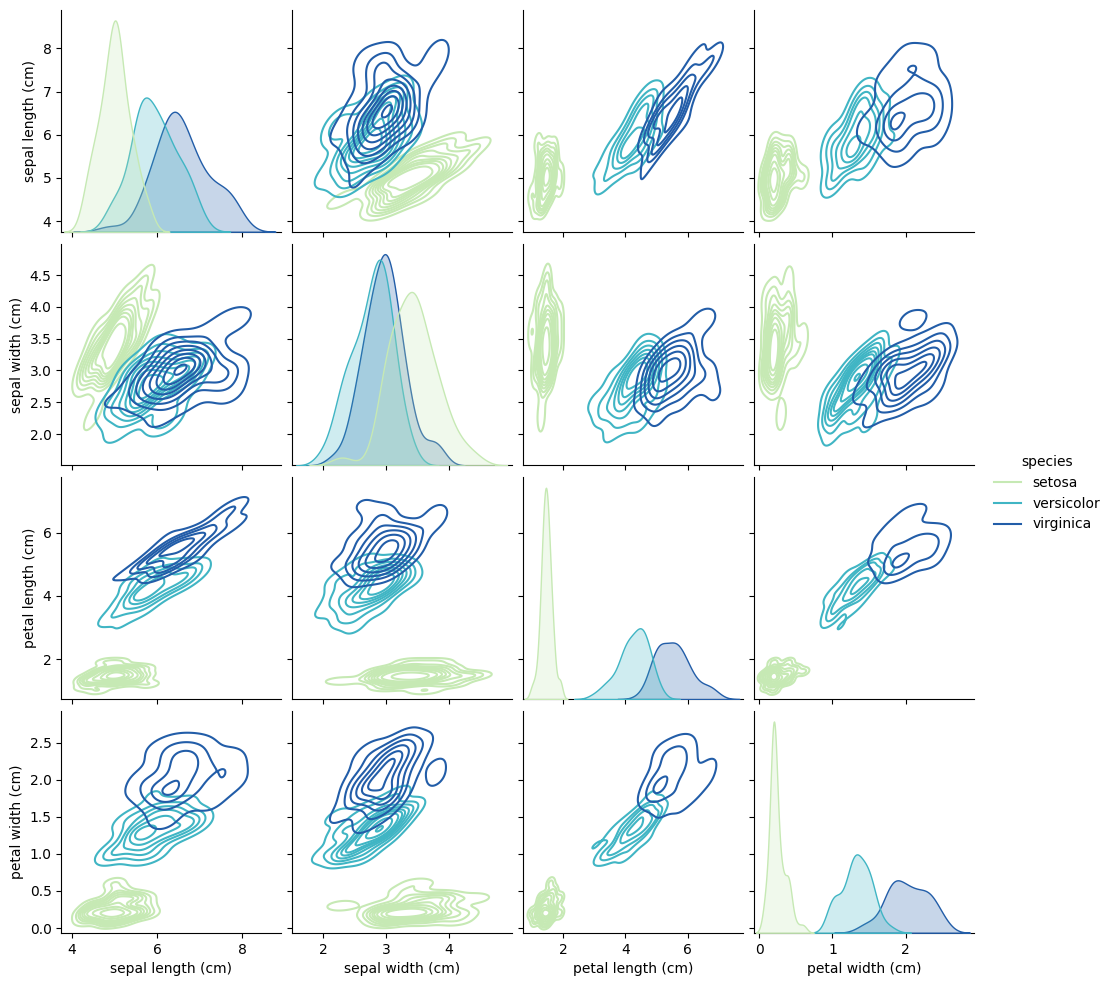

In [8]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series(iris.target).map(dict(zip(range(3),iris.target_names)))
sns.pairplot(iris_df, hue='species', palette="YlGnBu")
sns.pairplot(iris_df, kind="kde",  hue='species', palette="YlGnBu")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

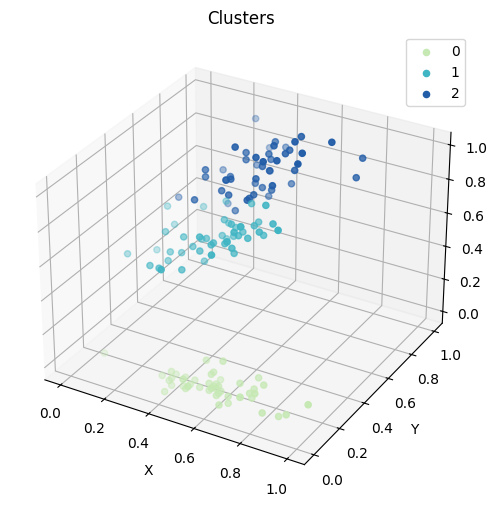

<IPython.core.display.Javascript object>

<style>
canvas#c65647b8_3fb2_4d1b_9945_c32b689f8eb4 {
  width: 640px;
  height: 480px;
  background-color: #ffffffff
}
</style>

<canvas width="640" height="480" id="plot_c65647b8_3fb2_4d1b_9945_c32b689f8eb4"></canvas>


<script>
  require(['Baby'], function(Baby) {
    function display_c65647b8_3fb2_4d1b_9945_c32b689f8eb4() {
        var vis = new Baby.Plots("plot_c65647b8_3fb2_4d1b_9945_c32b689f8eb4", {
          backgroundColor: "#ffffffff",
          turntable: false,
          rotationRate: 0.01,
          xScale: 1,
          yScale: 1,
          zScale: 1,
          shapeLegendTitle: "",
          upAxis: false
        });
        vis.Python = true;
        
          
            var coords = [[0.6249999999999999, 0.06779661016949151, 0.04166666666666667], [0.41666666666666663, 0.06779661016949151, 0.04166666666666667], [0.5, 0.05084745762711865, 0.04166666666666667], [0.4583333333333333, 0.0847457627118644, 0.04166666666666667], [0.6666666666666666, 0.06779661016949151, 0.04166666666666667], [0.7916666666666665, 0.11864406779661016, 0.12500000000000003], [0.5833333333333333, 0.06779661016949151, 0.08333333333333333], [0.5833333333333333, 0.0847457627118644, 0.04166666666666667], [0.3749999999999999, 0.06779661016949151, 0.04166666666666667], [0.4583333333333333, 0.0847457627118644, 0.0], [0.7083333333333333, 0.0847457627118644, 0.04166666666666667], [0.5833333333333333, 0.1016949152542373, 0.04166666666666667], [0.41666666666666663, 0.06779661016949151, 0.0], [0.41666666666666663, 0.016949152542372895, 0.0], [0.8333333333333333, 0.033898305084745756, 0.04166666666666667], [1.0, 0.0847457627118644, 0.12500000000000003], [0.7916666666666665, 0.05084745762711865, 0.12500000000000003], [0.6249999999999999, 0.06779661016949151, 0.08333333333333333], [0.7499999999999998, 0.11864406779661016, 0.08333333333333333], [0.7499999999999998, 0.0847457627118644, 0.08333333333333333], [0.5833333333333333, 0.11864406779661016, 0.04166666666666667], [0.7083333333333333, 0.0847457627118644, 0.12500000000000003], [0.6666666666666666, 0.0, 0.04166666666666667], [0.5416666666666665, 0.11864406779661016, 0.16666666666666669], [0.5833333333333333, 0.15254237288135591, 0.04166666666666667], [0.41666666666666663, 0.1016949152542373, 0.04166666666666667], [0.5833333333333333, 0.1016949152542373, 0.12500000000000003], [0.6249999999999999, 0.0847457627118644, 0.04166666666666667], [0.5833333333333333, 0.06779661016949151, 0.04166666666666667], [0.5, 0.1016949152542373, 0.04166666666666667], [0.4583333333333333, 0.1016949152542373, 0.04166666666666667], [0.5833333333333333, 0.0847457627118644, 0.12500000000000003], [0.8749999999999998, 0.0847457627118644, 0.0], [0.9166666666666666, 0.06779661016949151, 0.04166666666666667], [0.4583333333333333, 0.0847457627118644, 0.04166666666666667], [0.5, 0.033898305084745756, 0.04166666666666667], [0.6249999999999999, 0.05084745762711865, 0.04166666666666667], [0.6666666666666666, 0.06779661016949151, 0.0], [0.41666666666666663, 0.05084745762711865, 0.04166666666666667], [0.5833333333333333, 0.0847457627118644, 0.04166666666666667], [0.6249999999999999, 0.05084745762711865, 0.08333333333333333], [0.1249999999999999, 0.05084745762711865, 0.08333333333333333], [0.5, 0.05084745762711865, 0.04166666666666667], [0.6249999999999999, 0.1016949152542373, 0.20833333333333334], [0.7499999999999998, 0.15254237288135591, 0.12500000000000003], [0.41666666666666663, 0.06779661016949151, 0.08333333333333333], [0.7499999999999998, 0.1016949152542373, 0.04166666666666667], [0.5, 0.06779661016949151, 0.04166666666666667], [0.7083333333333333, 0.0847457627118644, 0.04166666666666667], [0.5416666666666665, 0.06779661016949151, 0.04166666666666667], [0.5, 0.6271186440677966, 0.5416666666666666], [0.5, 0.5932203389830508, 0.5833333333333334], [0.4583333333333333, 0.6610169491525424, 0.5833333333333334], [0.1249999999999999, 0.5084745762711864, 0.5], [0.3333333333333332, 0.6101694915254237, 0.5833333333333334], [0.3333333333333332, 

In [2]:
# Load the Iris dataset
iris = load_iris()

# Access attributes
data = iris.data  # The feature data (sepal length, sepal width, petal length, petal width)
norm_data = normalize(data)
target = iris.target  # The target labels (0 for Setosa, 1 for Versicolor, and 2 for Virginica)
target_names = iris.target_names  # The names of the target classes

# See the description of the dataset
description = iris.DESCR
print(description)

# Store datapoints by cluster
target_clusters = {}
for i in range(len(data)):
    target_i = 'cluster '+ str(target_names[target][i])

    if target_i not in target_clusters.keys():
        target_clusters[target_i] = {'points': []}
    target_clusters[target_i]['points'].append(i)



# Plot the normalized data in the hypercube [0,1]x[0,1]x[0,1] for all sets of dimensions.


scatter_clusters(norm_data, target_clusters, axis= [1,2,3])
immersive_scatter(norm_data, target_clusters, axis= [1,2,3])

Autoencoder

In [4]:
import keras

class Autoencoder(keras.Model):
    def __init__(self, input_shape=(4,)):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = keras.Sequential([
            keras.layers.Dense(2, activation='relu', input_shape=input_shape),
        ])

        # Decoder
        self.decoder = keras.Sequential([
            keras.layers.Dense(input_shape[0], activation='linear'),
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded
    


# Create the autoencoder
autoencoder = Autoencoder()

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(norm_data, norm_data, epochs=200)
loss = autoencoder.evaluate(norm_data, norm_data)
data_out = autoencoder.predict(norm_data)


print('Loss:', loss)





Epoch 1/200
5/5 [==============================] - 0s 1ms/step - loss: 0.2059
Epoch 2/200
5/5 [==============================] - 0s 567us/step - loss: 0.2003
Epoch 3/200
5/5 [==============================] - 0s 571us/step - loss: 0.1950
Epoch 4/200
5/5 [==============================] - 0s 620us/step - loss: 0.1899
Epoch 5/200
5/5 [==============================] - 0s 660us/step - loss: 0.1850
Epoch 6/200
5/5 [==============================] - 0s 668us/step - loss: 0.1805
Epoch 7/200
5/5 [==============================] - 0s 576us/step - loss: 0.1762
Epoch 8/200
5/5 [==============================] - 0s 544us/step - loss: 0.1720
Epoch 9/200
5/5 [==============================] - 0s 508us/step - loss: 0.1680
Epoch 10/200
5/5 [==============================] - 0s 820us/step - loss: 0.1641
Epoch 11/200
5/5 [==============================] - 0s 603us/step - loss: 0.1603
Epoch 12/200
5/5 [==============================] - 0s 815us/step - loss: 0.1567
Epoch 13/200
5/5 [=====================

5/5 [==============================] - 0s 1ms/step


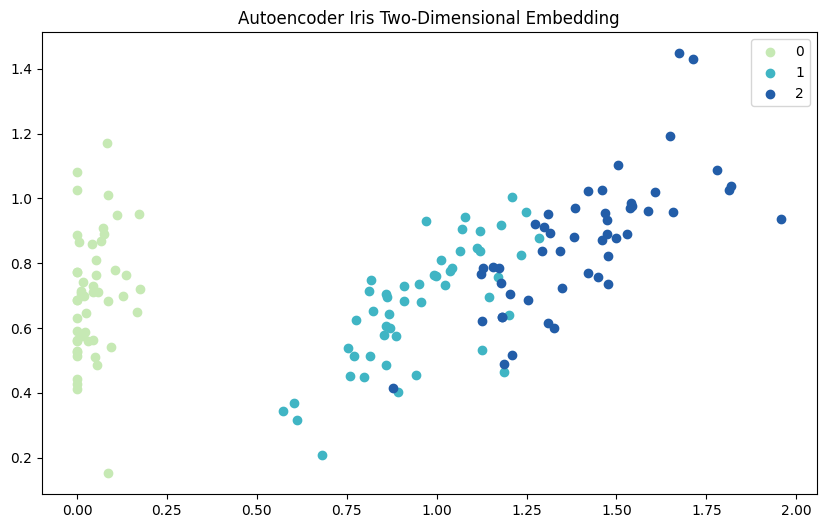

In [151]:
import keras

class Autoencoder(keras.Model):
    def __init__(self, input_shape=(4,), encoded_layers = 3):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = keras.Sequential([
            keras.layers.Dense(encoded_layers, activation='relu', input_shape=input_shape),
        ])

        # Decoder
        self.decoder = keras.Sequential([
            keras.layers.Dense(input_shape[0], activation='linear'),
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        return encoded

# Create the autoencoder
autoencoder_3d = Autoencoder(encoded_layers = 3)

# Compile the autoencoder
autoencoder_3d.compile(optimizer='adam', loss='mse')

embedding_3d = autoencoder_3d.predict(norm_data)

# Create the autoencoder
autoencoder_2d = Autoencoder(encoded_layers = 2)

# Compile the autoencoder
autoencoder_2d.compile(optimizer='adam', loss='mse')

embedding_2d = autoencoder_2d.predict(norm_data)




scatter_clusters(embedding_2d, target_clusters, title = "Autoencoder Iris Two-Dimensional Embedding", x_label = "", y_label = "")
#scatter_clusters(embedding_3d, target_clusters, title = "Autoencoder Iris Three-Dimensional Embedding", x_label = "", y_label = "", z_label = "")


5/5 [==============================] - 0s 3ms/step


IndexError: cannot do a non-empty take from an empty axes.

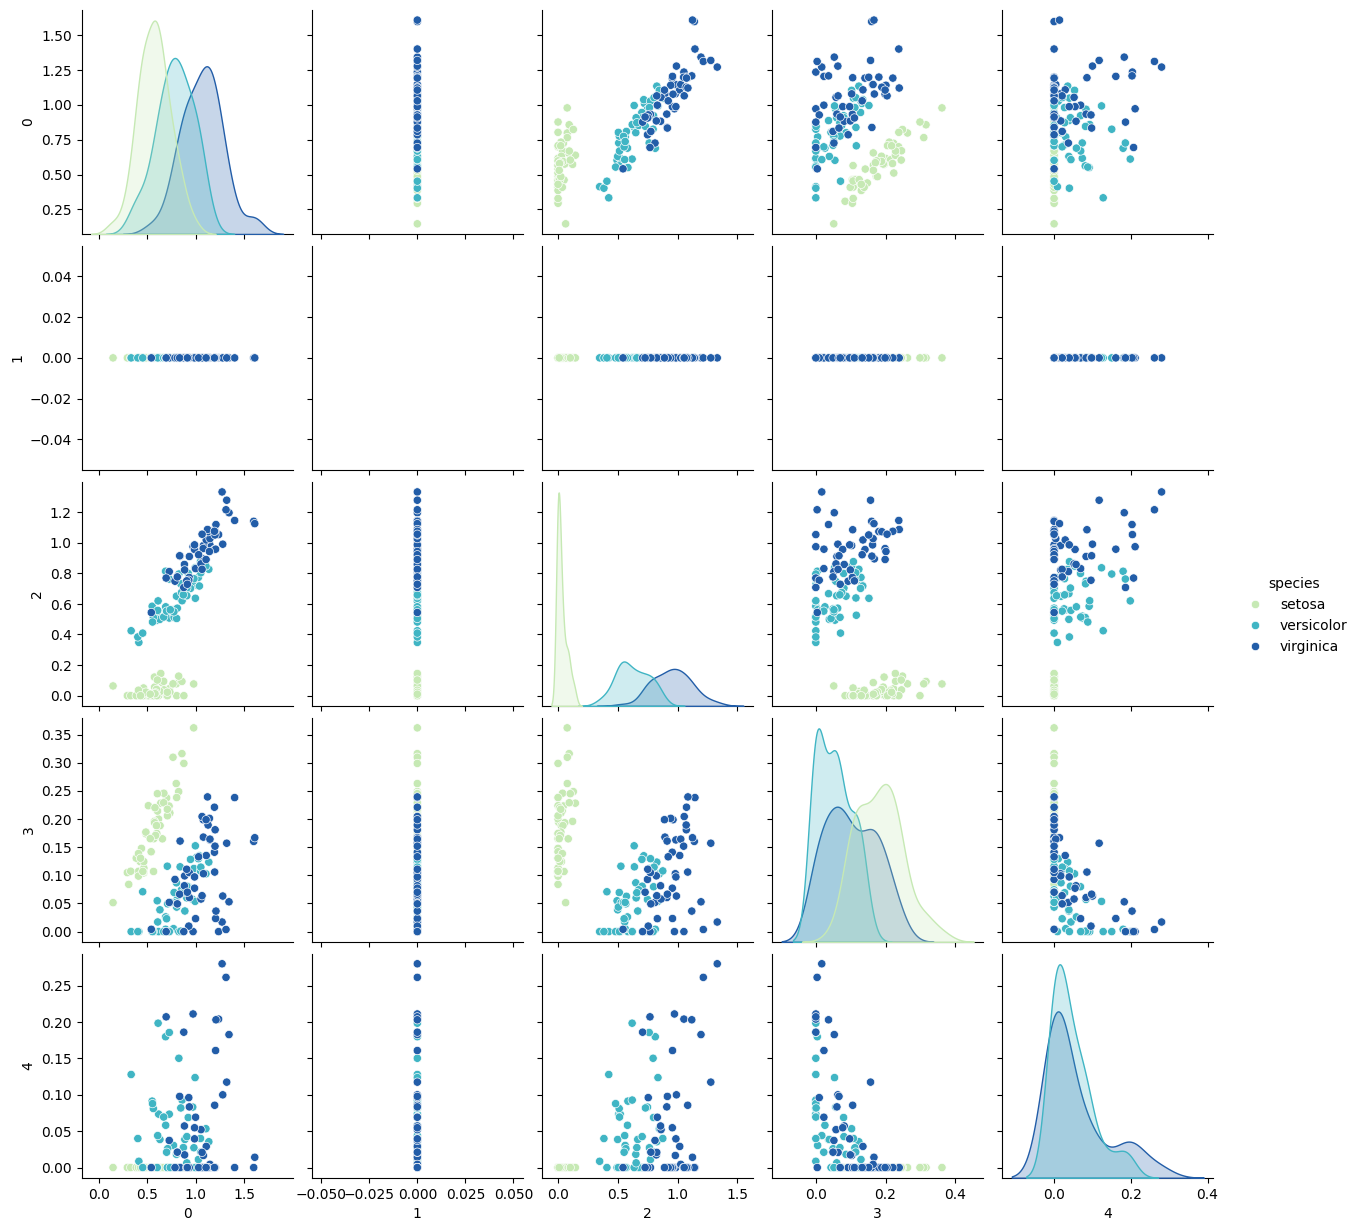

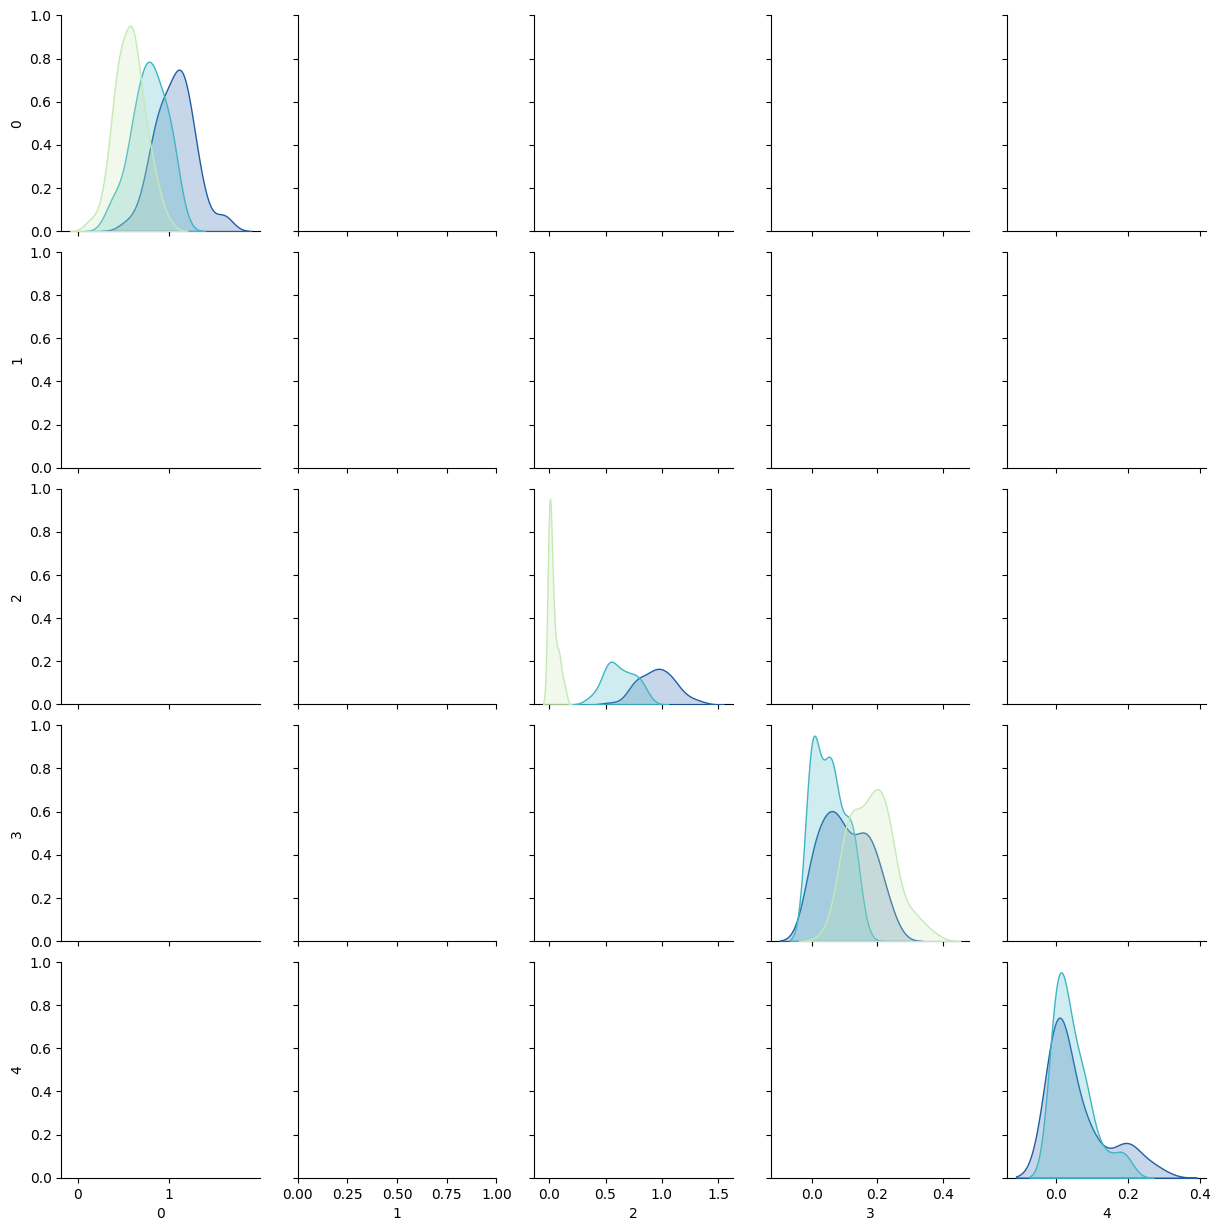

In [156]:
# Create the autoencoder
autoencoder_5d = Autoencoder(encoded_layers = 5)
# Compile the autoencoder
autoencoder_5d.compile(optimizer='adam', loss='mse')

embedding_5d = autoencoder_5d.predict(norm_data)
iris = load_iris()
iris_df = pd.DataFrame(embedding_5d)
iris_df['species'] = pd.Series(iris.target).map(dict(zip(range(3),iris.target_names)))
sns.pairplot(iris_df, hue='species', palette="YlGnBu")
sns.pairplot(iris_df, kind="kde",  hue='species', palette="YlGnBu")

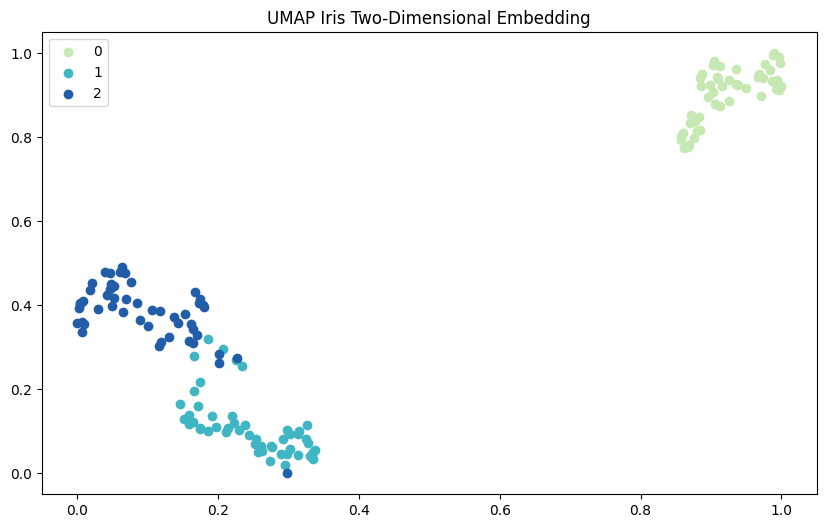

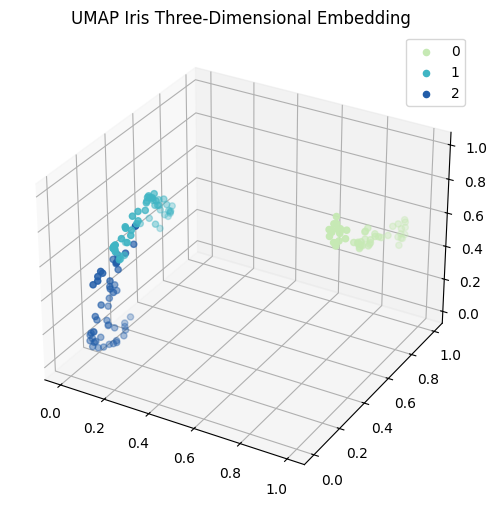

In [5]:
import umap

mapper = umap.UMAP(min_dist=0.1, metric="euclidean", n_components =2).fit(norm_data)
embedding_2d = mapper.embedding_
mapper = umap.UMAP(min_dist=0.1, metric="euclidean", n_components =3).fit(norm_data)
embedding_3d = mapper.embedding_

embedding_2d = normalize(embedding_2d)
embedding_3d = normalize(embedding_3d)

scatter_clusters(embedding_2d, target_clusters, title = "UMAP Iris Two-Dimensional Embedding", x_label = "", y_label = "")
scatter_clusters(embedding_3d, target_clusters, title = "UMAP Iris Three-Dimensional Embedding", x_label = "", y_label = "", z_label = "")


Clusters

In [53]:
G = grid(dim = 2, size = 1/11)
len(G)

144

In [60]:
experiment_data = embedding_2d
n_experiments = 1
sigmas = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
G = grid(dim = 2, size = 1/11)
mountain_indexes = np.zeros((len(sigmas),7))
indexes = np.zeros((n_experiments, 3))

for s,sigma in tqdm(enumerate(sigmas), desc="Running experiments"):
    
    for i in range(n_experiments):
        # Mountain
        model = MountainClustering(sigma= sigma)
        # model = SpectralClustering(k=3, sigma = sigma)
        mountain_clusters = model.cluster(experiment_data, G, show = False) 
        indexes[i, 0:3] = intra_cluster_indices(experiment_data, mountain_clusters, show = False)
        # indexes[i, 5:7] = extra_cluster_indices(norm_data, mountain_clusters, target_clusters, show = False)
    mountain_indexes[s, 0] = sigma
    mountain_indexes[s, 1] = sigma*1.25
    mountain_indexes[s, 2:5] = np.round(np.mean(indexes, axis=0),4)

Running experiments: 7it [00:00, 16.03it/s]


In [60]:
def array_to_latex_table(results, headers):
    # Start building the LaTeX table string
    latex_table = "\\begin{table}[h]\n"
    latex_table += "\\centering\n"
    
    # Add the table caption if needed
    latex_table += "\\caption{Your table caption here}\n"
    
    # Begin the tabular environment and specify the column format
    num_columns = len(headers)
    latex_table += "\\begin{tabular}{|" + "c|" * num_columns + "}\n"
    
    # Add the table headers
    latex_table += "\\hline\n"
    for header in headers:
        latex_table += header + " & "
    # Remove the trailing " & "
    latex_table = latex_table[:-2] + "\\\\\n"  # Newline after the headers
    latex_table += "\\hline\n"
    
    # Add the table data
    for row in results:
        for value in row:
            latex_table += f"{value:.3f} & " 
        # Remove the trailing " & "
        latex_table = latex_table[:-2] + "\\\\\n"  # Newline after each row
    
    # End the tabular environment
    latex_table += "\\hline\n"
    latex_table += "\\end{tabular}\n"
    
    # End the table environment
    latex_table += "\\end{table}\n"
    
    return latex_table

print(array_to_latex_table(mountain_indexes[:, [0,1,2,3,4]], [" sigma", "beta","Adjusted Rand Index", "Normalized Mutual Information", "Fowlkes-Mallows Index"]))



\begin{table}[h]
\centering
\caption{Your table caption here}
\begin{tabular}{|c|c|c|c|c|}
\hline
 sigma & beta & Adjusted Rand Index & Normalized Mutual Information & Fowlkes-Mallows Index \\
\hline
0.200 & 0.250 & 0.238 & 0.626 & 122.817 \\
0.300 & 0.375 & 0.517 & 0.682 & 200.887 \\
0.400 & 0.500 & 0.517 & 0.682 & 200.887 \\
0.500 & 0.625 & 0.517 & 0.682 & 200.887 \\
0.600 & 0.750 & 0.517 & 0.682 & 200.887 \\
0.700 & 0.875 & 0.189 & 0.677 & 107.884 \\
0.800 & 1.000 & 0.517 & 0.682 & 200.887 \\
\hline
\end{tabular}
\end{table}



In [24]:
mountain_indexes[:, [0,3,4,5]]

array([[0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561,

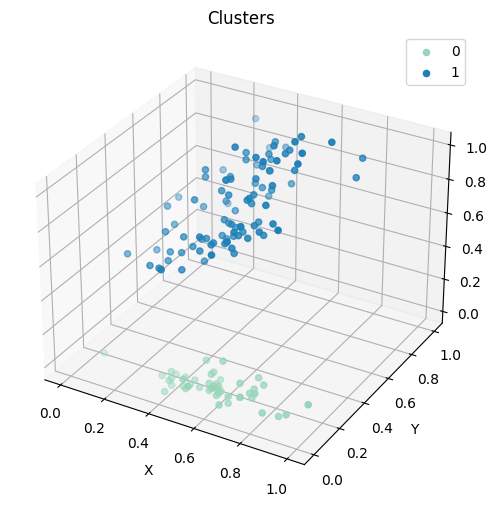

In [26]:
G = grid(dim = 4, size = 1/4)
model = MountainClustering(sigma= 0.1)
mountain_clusters = model.cluster(norm_data, G, show= False) 
scatter_clusters(norm_data, mountain_clusters, axis = [1,2,3])

In [161]:
len(grid(dim = 5, size = 1/2))

243

In [162]:
experimental_data = embedding_5d
G = grid(dim = 5, size = 1/2)

model = MountainClustering()
mountain_clusters = model.cluster(experimental_data, G, show= False) 
mountain_indexes[i, 0:3] = intra_cluster_indices(experimental_data, mountain_clusters, show = False)
mountain_indexes[i, 3:6] = extra_cluster_indices(experimental_data, mountain_clusters, target_clusters, show = False)

model = SubtractiveClustering(alpha_radius=0.5, max_iterations=100)
subtractive_clusters = model.cluster(experimental_data, show = False)
subtractive_indexes[i, 0:3] = intra_cluster_indices(experimental_data, subtractive_clusters, show = False)
subtractive_indexes[i, 3:6] = extra_cluster_indices(experimental_data, subtractive_clusters, target_clusters, show = False)

model = KMeansClustering(k = 3)
kmeans_clusters = model.cluster(experimental_data)
kmeans_indexes[i, 0:3] = intra_cluster_indices(experimental_data, kmeans_clusters, show = False)
kmeans_indexes[i, 3:6] = extra_cluster_indices(experimental_data, kmeans_clusters, target_clusters, show= False)

model = FuzzyCMeansClustering(k = 3, m = 2)
fuzzycmeans_clusters = model.cluster(experimental_data)
fuzzycmeans_indexes[i, 0:3] = intra_cluster_indices(experimental_data, fuzzycmeans_clusters, show = False)
fuzzycmeans_indexes[i, 3:6] = extra_cluster_indices(experimental_data, fuzzycmeans_clusters, target_clusters, show = False)

model = SpectralClustering(k=3)
spectral_clusters = model.cluster(experimental_data)
spectral_indexes[i, 0:3] = intra_cluster_indices(experimental_data, spectral_clusters, show = False)
spectral_indexes[i, 3:6] = extra_cluster_indices(experimental_data, spectral_clusters, target_clusters, show = False)

box_cluster = box_clusters(boxes(D, div = 3), D) 
box_indexes[i, 0:3] = intra_cluster_indices(experimental_data, box_cluster, show = False)
box_indexes[i, 3:6] = extra_cluster_indices(experimental_data, box_cluster, target_clusters, show = False)


/var/folders/bq/_pm3gptx09qgc2n6byhqt8zm0000gn/T/ipykernel_18062/4181790225.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = get_cmap('YlGnBu')(np.linspace(0, 1, len(methods)+2))


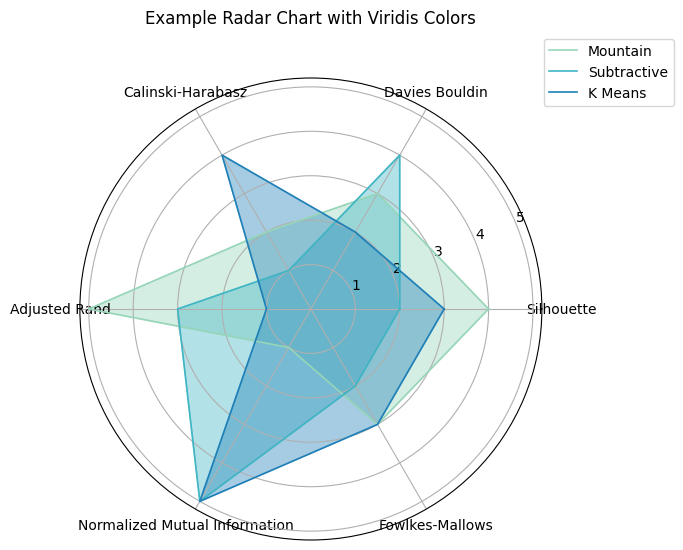

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

def radar_plot(categories, values_list, methods, title='Radar Chart'):
    # Number of categories
    num_categories = len(categories)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

    # The plot is circular, so we close the plot loop by appending the starting value to the end
    angles += angles[:1]

    # Set color to viridis
    colors = get_cmap('YlGnBu')(np.linspace(0, 1, len(methods)+2))

    # Plot the radar chart for each set of values
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    for i, values in enumerate(values_list):
        values += values[:1]
        ax.plot(angles, values, linewidth=1.2, linestyle='solid', color=colors[i+2], label=methods[i])
        ax.fill(angles, values, alpha=0.4, color=colors[i+2])

    # Add labels, legend, and title
    ax.set_thetagrids(np.degrees(angles[:-1]), categories)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    ax.set_title(title, y=1.1)  # Adjust the y-coordinate to leave more space

    # Show the plot
    plt.show()

# Example usage with multiple sets of values
categories = ['Silhouette', 'Davies Bouldin', 'Calinski-Harabasz', 'Adjusted Rand', 'Normalized Mutual Information', 'Fowlkes-Mallows']
values_list = [
    [4, 3, 2, 5, 1, 3],
    [2, 4, 1, 3, 5, 2],
    [3, 2, 4, 1, 5, 3]
]
methods = ['Mountain', 'Subtractive', 'K Means', 'Fuzzy C Means', 'Spectral']

radar_plot(categories, values_list, methods, title='Example Radar Chart with Viridis Colors')


In [14]:
experimental_data = embedding_2d
n_experiments = 100

G = grid(dim = 2, size = 1/11)
D = distance(experimental_data, metric = 'euclidean')

mountain_indexes = np.zeros((n_experiments, 6))
subtractive_indexes = np.zeros((n_experiments, 6))
kmeans_indexes = np.zeros((n_experiments, 6))
fuzzycmeans_indexes = np.zeros((n_experiments, 6))
spectral_indexes = np.zeros((n_experiments, 6))
box_indexes = np.zeros((n_experiments, 6))
neighbor_indexes = np.zeros((n_experiments, 6))

# Mountain
model = MountainClustering()
mountain_clusters = model.cluster(experimental_data, G, show= False) 
mountain_indexes[0, 0:3] = intra_cluster_indices(experimental_data, mountain_clusters, show = False)
mountain_indexes[0, 3:6] = extra_cluster_indices(experimental_data, mountain_clusters, target_clusters, show = False)

# Subtractive
model = SubtractiveClustering(alpha_radius=0.5, max_iterations=100)
subtractive_clusters = model.cluster(experimental_data, show = False)
subtractive_indexes[0, 0:3] = intra_cluster_indices(experimental_data, subtractive_clusters, show = False)
subtractive_indexes[0, 3:6] = extra_cluster_indices(experimental_data, subtractive_clusters, target_clusters, show = False)

for i in tqdm(range(n_experiments), desc="Running experiments"):
    # # Mountain
    # model = MountainClustering()
    # mountain_clusters = model.cluster(experimental_data, G, show= False) 
    # mountain_indexes[i, 0:3] = intra_cluster_indices(experimental_data, mountain_clusters, show = False)
    # mountain_indexes[i, 3:6] = extra_cluster_indices(experimental_data, mountain_clusters, target_clusters, show = False)

    # # Subtractive
    # model = SubtractiveClustering(alpha_radius=0.5, max_iterations=100)
    # subtractive_clusters = model.cluster(experimental_data, show = False)
    # subtractive_indexes[i, 0:3] = intra_cluster_indices(experimental_data, subtractive_clusters, show = False)
    # subtractive_indexes[i, 3:6] = extra_cluster_indices(experimental_data, subtractive_clusters, target_clusters, show = False)

    # KMeans
    model = KMeansClustering(k = 3)
    kmeans_clusters = model.cluster(experimental_data)
    kmeans_indexes[i, 0:3] = intra_cluster_indices(experimental_data, kmeans_clusters, show = False)
    kmeans_indexes[i, 3:6] = extra_cluster_indices(experimental_data, kmeans_clusters, target_clusters, show= False)

    # FuzzyCMeans
    model = FuzzyCMeansClustering(k = 3, m = 2)
    fuzzycmeans_clusters = model.cluster(experimental_data)
    fuzzycmeans_indexes[i, 0:3] = intra_cluster_indices(experimental_data, fuzzycmeans_clusters, show = False)
    fuzzycmeans_indexes[i, 3:6] = extra_cluster_indices(experimental_data, fuzzycmeans_clusters, target_clusters, show = False)

    # Spectral
    model = SpectralClustering(k=3)
    spectral_clusters = model.cluster(experimental_data)
    spectral_indexes[i, 0:3] = intra_cluster_indices(experimental_data, spectral_clusters, show = False)
    spectral_indexes[i, 3:6] = extra_cluster_indices(experimental_data, spectral_clusters, target_clusters, show = False)

    # # Box
    # # D = distance(experimental_data, metric = 'euclidean')
    # box_cluster = box_clusters(boxes(D, div = 3), D) 
    # box_indexes[i, 0:3] = intra_cluster_indices(experimental_data, box_cluster, show = False)
    # box_indexes[i, 3:6] = extra_cluster_indices(experimental_data, box_cluster, target_clusters, show = False)

    # # Neighbors
    # neighbor_clusters = neighbors(D, 3, 0.1)
    # neighbor_indexes[i, 0:3] = intra_cluster_indices(experimental_data, neighbor_clusters, show = False)
    # neighbor_indexes[i, 3:6] = extra_cluster_indices(experimental_data, neighbor_clusters, target_clusters, show = False)

    
    

Running experiments: 100%|██████████| 100/100 [01:10<00:00,  1.41it/s]


In [168]:
len(grid(dim = 4, size = 1/3))

256

/var/folders/bq/_pm3gptx09qgc2n6byhqt8zm0000gn/T/ipykernel_18062/4181790225.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = get_cmap('YlGnBu')(np.linspace(0, 1, len(methods)+2))


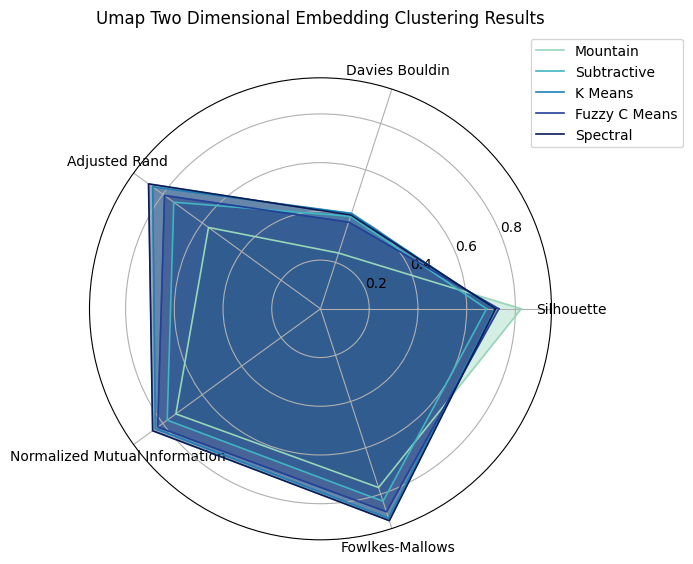

In [16]:
categories = ['Silhouette', 'Davies Bouldin', 'Adjusted Rand', 'Normalized Mutual Information', 'Fowlkes-Mallows']
values_list = [list(mountain_indexes[0,[0,1,3,4,5]]), list(subtractive_indexes[0,[0,1,3,4,5]]), list(np.mean(kmeans_indexes[:,[0,1,3,4,5]],0)), 
               list(np.mean(fuzzycmeans_indexes[:,[0,1,3,4,5]],0)), list(np.mean(spectral_indexes[:,[0,1,3,4,5]],0))
]
methods = ['Mountain', 'Subtractive', 'K Means', 'Fuzzy C Means', 'Spectral']

radar_plot(categories, values_list, methods, title='Umap Two Dimensional Embedding Clustering Results')

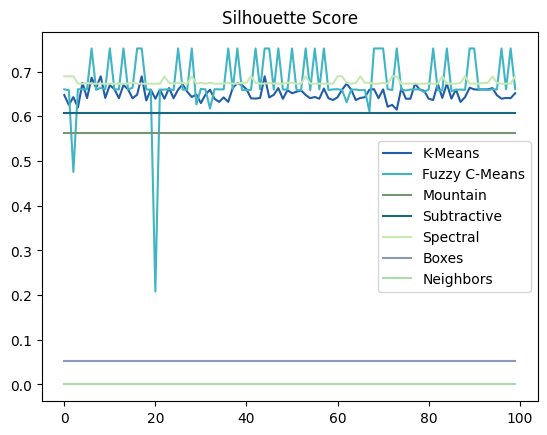

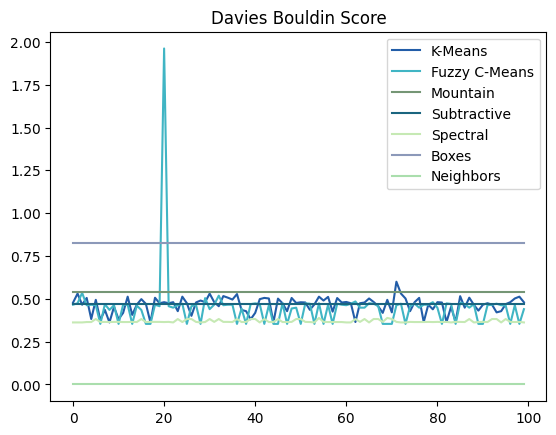

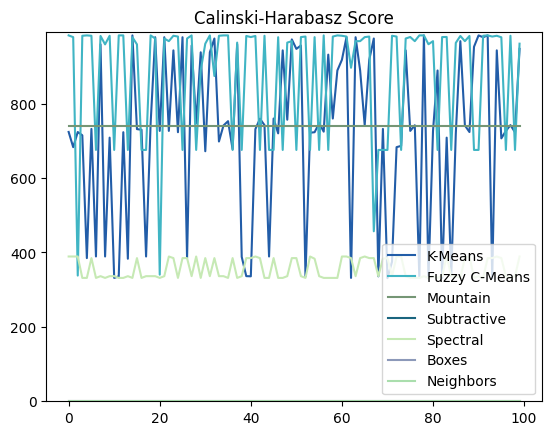

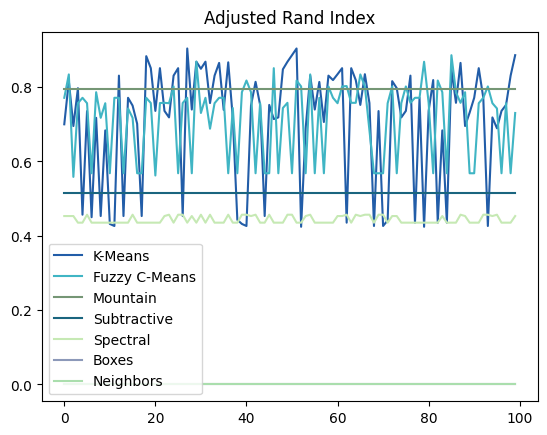

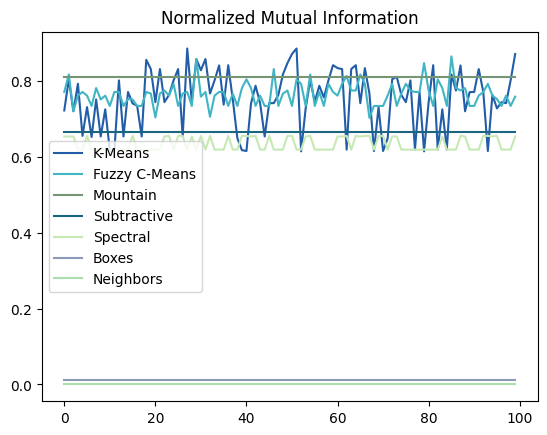

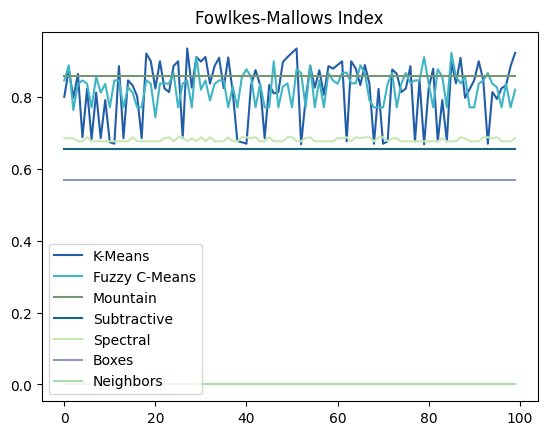

In [71]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


"#225DA8"
"#40B5C4"
"#C6E9B4"

plt.plot(kmeans_indexes[:,0], color = "#225DA8", label = "K-Means")
plt.plot(fuzzycmeans_indexes[:,0], color = "#40B5C4", label = "Fuzzy C-Means")
plt.plot(mountain_indexes[:,0], color = "#759675", label = "Mountain")
plt.plot(subtractive_indexes[:,0], color = "#1A657F", label = "Subtractive")
plt.plot(spectral_indexes[:,0], color = "#C6E9B4", label = "Spectral")
plt.plot(box_indexes[:,0], color = "#8c99b9", label = "Boxes")
plt.plot(neighbor_indexes[:,0], color = "#aadead", label = "Neighbors")
plt.legend()

plt.title("Silhouette Score")
plt.show()

plt.plot(kmeans_indexes[:,1], color = "#225DA8", label = "K-Means")
plt.plot(fuzzycmeans_indexes[:,1], color = "#40B5C4", label = "Fuzzy C-Means")
plt.plot(mountain_indexes[:,1], color = "#759675", label = "Mountain")
plt.plot(subtractive_indexes[:,1], color = "#1A657F", label = "Subtractive")
plt.plot(spectral_indexes[:,1], color = "#C6E9B4", label = "Spectral")
plt.plot(box_indexes[:,1], color = "#8c99b9", label = "Boxes")
plt.plot(neighbor_indexes[:,1], color = "#aadead", label = "Neighbors")
plt.legend()
plt.title("Davies Bouldin Score")
plt.show()

plt.plot(kmeans_indexes[:,2], color = "#225DA8", label = "K-Means")
plt.plot(fuzzycmeans_indexes[:,2], color = "#40B5C4", label = "Fuzzy C-Means")
plt.plot(mountain_indexes[:,2], color = "#759675", label = "Mountain")
plt.plot(subtractive_indexes[:,2], color = "#1A657F", label = "Subtractive")
plt.plot(spectral_indexes[:,2], color = "#C6E9B4", label = "Spectral")
plt.plot(box_indexes[:,2], color = "#8c99b9", label = "Boxes")
plt.plot(neighbor_indexes[:,2], color = "#aadead", label = "Neighbors")
plt.legend()
plt.ylim(0, np.max(kmeans_indexes[:,2])+10)
plt.title("Calinski-Harabasz Score")
plt.show()

plt.plot(kmeans_indexes[:,3], color = "#225DA8", label = "K-Means")
plt.plot(fuzzycmeans_indexes[:,3], color = "#40B5C4", label = "Fuzzy C-Means")
plt.plot(mountain_indexes[:,3], color = "#759675", label = "Mountain")
plt.plot(subtractive_indexes[:,3], color = "#1A657F", label = "Subtractive")
plt.plot(spectral_indexes[:,3], color = "#C6E9B4", label = "Spectral")
plt.plot(box_indexes[:,3], color = "#8c99b9", label = "Boxes")
plt.plot(neighbor_indexes[:,3], color = "#aadead", label = "Neighbors")
plt.legend()
plt.title("Adjusted Rand Index")
plt.show()

plt.plot(kmeans_indexes[:,4], color = "#225DA8", label = "K-Means")
plt.plot(fuzzycmeans_indexes[:,4], color = "#40B5C4", label = "Fuzzy C-Means")
plt.plot(mountain_indexes[:,4], color = "#759675", label = "Mountain")
plt.plot(subtractive_indexes[:,4], color = "#1A657F", label = "Subtractive")
plt.plot(spectral_indexes[:,4], color = "#C6E9B4", label = "Spectral")
plt.plot(box_indexes[:,4], color = "#8c99b9", label = "Boxes")
plt.plot(neighbor_indexes[:,4], color = "#aadead", label = "Neighbors")
plt.legend()
plt.title("Normalized Mutual Information")
plt.show()

plt.plot(kmeans_indexes[:,5], color = "#225DA8", label = "K-Means")
plt.plot(fuzzycmeans_indexes[:,5], color = "#40B5C4", label = "Fuzzy C-Means")
plt.plot(mountain_indexes[:,5], color = "#759675", label = "Mountain")
plt.plot(subtractive_indexes[:,5], color = "#1A657F", label = "Subtractive")
plt.plot(spectral_indexes[:,5], color = "#C6E9B4", label = "Spectral")
plt.plot(box_indexes[:,5], color = "#8c99b9", label = "Boxes")
plt.plot(neighbor_indexes[:,5], color = "#aadead", label = "Neighbors")
plt.legend()
plt.title("Fowlkes-Mallows Index")
plt.show()

Silhoutte Score :  0.5024177300277779
Davies Bouldin Score :  0.755815837704192
Calinski Harabasz Score :  339.01132371234115
Adjusted Rand Index :  0.6844056129203071
Normalized Mutual Information :  0.7649659696235372
Fowlkes-Mallows Index :  0.7946074670353508


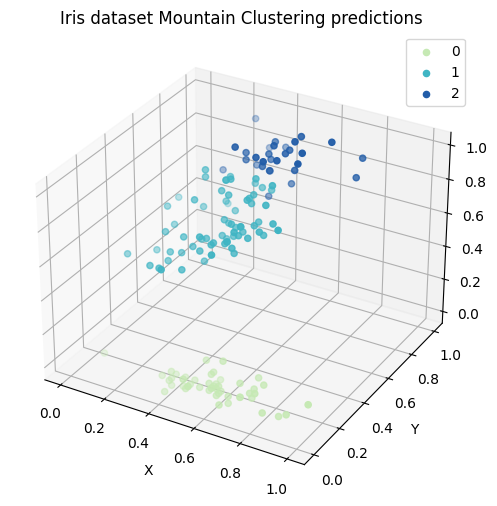

Silhoutte Score :  0.5066117585512964
Davies Bouldin Score :  0.7546318392644668
Calinski Harabasz Score :  357.554940866505
Adjusted Rand Index :  0.7445264308738749
Normalized Mutual Information :  0.7776631579462302
Fowlkes-Mallows Index :  0.8306394195437843


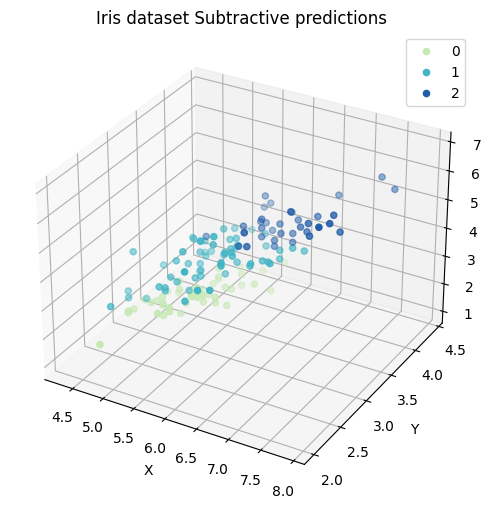

Silhoutte Score :  0.5032563362394691
Davies Bouldin Score :  0.7619136069169629
Calinski Harabasz Score :  353.7421106665186
Adjusted Rand Index :  0.7733799163281196
Normalized Mutual Information :  0.8138214462814856
Fowlkes-Mallows Index :  0.8497957418394767


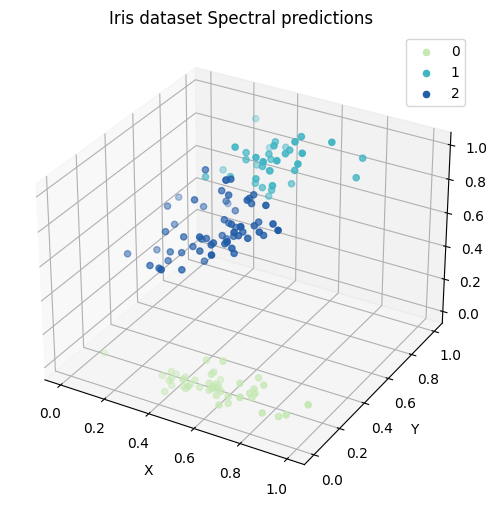

Silhoutte Score :  0.4599503361126447
Davies Bouldin Score :  0.8151746882401326
Calinski Harabasz Score :  325.27124680614884
Adjusted Rand Index :  0.8026452685653829
Normalized Mutual Information :  0.8125564476804745
Fowlkes-Mallows Index :  0.8683061950066946


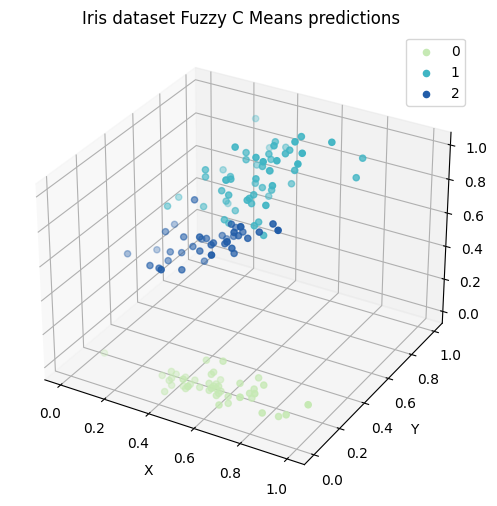

Silhoutte Score :  0.485184324610377
Davies Bouldin Score :  0.7174815227276539
Calinski Harabasz Score :  175.24005789289248
Adjusted Rand Index :  0.8026452685653829
Normalized Mutual Information :  0.8125564476804745
Fowlkes-Mallows Index :  0.8683061950066946


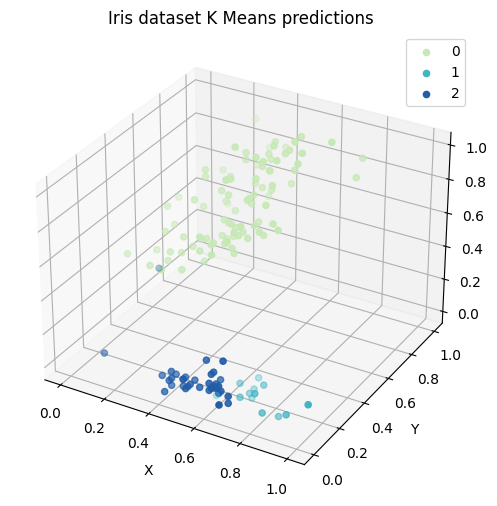

In [182]:
G = grid(dim = 4, size = 1/4)
model = MountainClustering()
mountain_clusters = model.cluster(norm_data, G, show= False) 
intra_cluster_indices(norm_data, mountain_clusters)
extra_cluster_indices(norm_data, mountain_clusters, target_clusters)
scatter_clusters(norm_data, mountain_clusters, title = "Iris dataset Mountain Clustering predictions", axis = [1,2,3])

model = SubtractiveClustering(alpha_radius=0.5, max_iterations=100)
subtractive_clusters = model.cluster(norm_data, show = False)
intra_cluster_indices(norm_data, subtractive_clusters)
extra_cluster_indices(norm_data, subtractive_clusters, target_clusters)
scatter_clusters(data, subtractive_clusters, title = "Iris dataset Subtractive predictions")

model = SpectralClustering(k=3)
spectral_clusters = model.cluster(norm_data)
intra_cluster_indices(norm_data, spectral_clusters)
extra_cluster_indices(norm_data, spectral_clusters, target_clusters)
scatter_clusters(norm_data, spectral_clusters, title = "Iris dataset Spectral predictions", axis = [1,2,3])
                 
model = FuzzyCMeansClustering(k = 3, m = 2)
fuzzycmeans_clusters = model.cluster(norm_data)
intra_cluster_indices(norm_data, fuzzycmeans_clusters)
extra_cluster_indices(norm_data, fuzzycmeans_clusters, target_clusters)
scatter_clusters(norm_data, fuzzycmeans_clusters, title = "Iris dataset Fuzzy C Means predictions", axis = [1,2,3])

model = KMeansClustering(k = 3)
kmeans_clusters = model.cluster(norm_data)
intra_cluster_indices(norm_data, kmeans_clusters)
extra_cluster_indices(norm_data, fuzzycmeans_clusters, target_clusters)
scatter_clusters(norm_data, kmeans_clusters, title = "Iris dataset K Means predictions", axis=[1,2,3])

In [189]:
import numpy as np


def confusion_matrix(target_clusters, clusters):
    
    confusion = np.zeros((len(target_clusters.keys()), len(clusters.keys())))
    confusion_df = pd.DataFrame(confusion, columns=target_clusters.keys(), index=clusters.keys())
    for target_key, target_value in target_clusters.items():
        for key, value in clusters.items():
            expected = set(target_value['points'])
            predicted = set(value['points'])

            confusion_df[target_key][key] = len(expected.intersection(predicted))
    labels = []


    for i in confusion_df:
        if list(clusters.keys())[ np.argmax(list(confusion_df[i]))] not in labels:
            labels.append(list(clusters.keys())[ np.argmax(list(confusion_df[i]))])


    return confusion_df.reindex(labels)



print(confusion_matrix(target_clusters, spectral_clusters))
print(confusion_matrix(target_clusters, mountain_clusters))
print(confusion_matrix(target_clusters, subtractive_clusters))
print(confusion_matrix(target_clusters, fuzzycmeans_clusters))
print(confusion_matrix(target_clusters, kmeans_clusters))



           cluster setosa  cluster versicolor  cluster virginica
cluster 0            49.0                 0.0                0.0
cluster 2             0.0                50.0               13.0
cluster 1             0.0                 0.0               37.0
             cluster setosa  cluster versicolor  cluster virginica
cluster 50             50.0                 0.0                0.0
cluster 312             0.0                50.0               20.0
cluster 424             0.0                 0.0               30.0
             cluster setosa  cluster versicolor  cluster virginica
cluster 7              50.0                 0.0                0.0
cluster 78              0.0                49.0               14.0
cluster 112             0.0                 1.0               36.0
           cluster setosa  cluster versicolor  cluster virginica
cluster 0            50.0                 0.0                0.0
cluster 1             0.0                40.0                1.0
cluster 2

Box Method

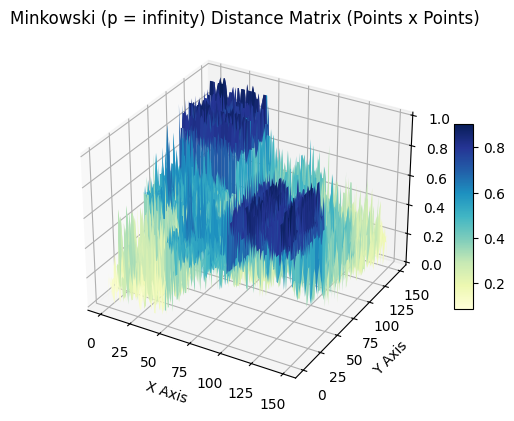

In [29]:
plotting = True
metric = 'lp'
clusters = 3



# Calculate the distance matrix from all points to all points and plot the heatmap.
D = distance(norm_data, metric = metric)
surface(D, "Minkowski (p = infinity) Distance Matrix (Points x Points)")

In [24]:
plotting = True
metric = 'mahalanobis'
clusters = 4
categorical = None
# If data contains categorical variables, use one-hot-encoding. Normalize data
if categorical != None:
    categorical_data = one_hot_encoding(data, categorical)
    norm_data = normalize(categorical_data)
else: norm_data = normalize(data)



# Calculate the distance matrix from all points to all points and plot the heatmap.
D = distance(norm_data, metric = metric)
if plotting: 
    heatmap(D, "Heatmap of "+metric+" Distance Matrix (Points x Points)") 
    surface(D, "Mahalanobis Distance Matrix (Points x Points)")

# Sort the distance matrix using the boxes cluster criteria and plot the heatmap and surface map.
D, _, _ = sort_distances(distance(norm_data, metric = metric), div=clusters)
if plotting: 
    heatmap(D, "Heatmap of sorted "+metric+" Distance Matrix (Points x Points)")
    surface(D, "Surface plot of sorted "+metric+" Distance Matrix (Points x Points)")

vertices = grid(norm_data.shape[1], 1/2)

# Calculate the distance matrix from all vertices to all points and plot the heatmap.
D = distance(norm_data, vertices, metric = metric)
# if plotting: 
#     heatmap(D, "Heatmap of "+metric+" Distance Matrix (Vertices x Points)") 
#     surface(D, "Surface plot of "+metric+" Distance Matrix (Vertices x Points)")

Clusters = []
Metrics = ['euclidean', 'manhattan', 'cosine', 'lp']
Metrics = ['euclidean']
for met in Metrics:

    D = distance(norm_data, metric = met)

    b = boxes(D, div = clusters)
    
    M = box_clusters(b, D)
    Clusters.append(M)

    labels = neighbors(D, clusters, 0.15)

    Clusters.append(labels)



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

<Figure size 800x600 with 0 Axes>

In [65]:
mountain_clusters

{'cluster 50': {'center': array([0. , 0.5, 0. , 0. ]),
  'points': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
 'cluster 312': {'center': array([0.5, 0.5, 0.5, 0.5]),
  'points': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
          63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
          76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
          89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 103,
         106, 110, 111, 113, 116, 119, 121, 123, 126, 127, 133, 134, 137,
         138, 142, 146, 147, 149])},
 'cluster 424': {'center': array([0.75, 0.25, 1.  , 1.  ]),
  'points': array([100, 102, 104, 105, 107, 108, 109, 112, 114, 115, 117, 118, 120,
         122, 124, 125, 128, 129, 130, 131, 132, 135, 136, 139, 140, 141,
         143, 

In [6]:
D = distance(norm_data, metric = 'euclidean')
M = box_clusters(boxes(D, div = 4), D)

{'cluster 0': {'points': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112,
   113,
   114,
   115,
   116,
   117,
   118,
   119,
   120,
   121,
   122,
   123,
   124,
   125,
   126,
   127,
   128,
   129,
   130,
   131,
   132,
   133,
   134,
   135,

ValueError: array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
       0.83333333, 1.        ]) is not a valid value for color

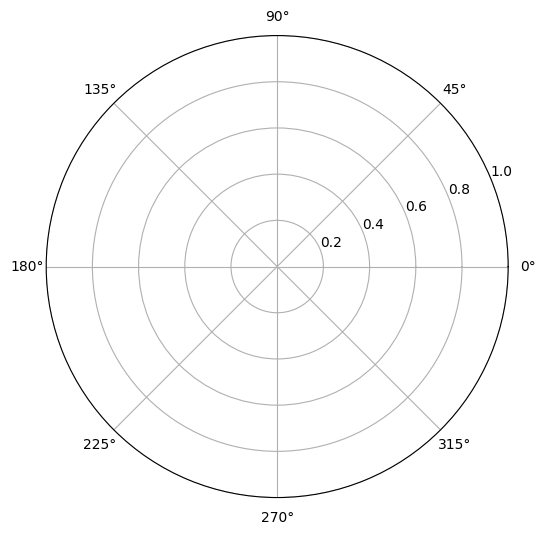

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import viridis

def radar_plot(categories, values, title='Radar Chart'):
    # Number of categories
    num_categories = len(categories)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

    # The plot is circular, so we close the plot loop by appending the starting value to the end
    values += values[:1]
    angles += angles[:1]

    # Set color to viridis
    colors = np.linspace(0, 1, len(values))

    # Plot the radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=colors)
    ax.fill(angles, values, alpha=0.4, color=colors)

    # Add labels and legend
    ax.set_thetagrids(np.degrees(angles[:-1]), categories)
    ax.set_title(title, y=1.1)  # Adjust the y-coordinate to leave more space
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # Adjust layout to leave more space between title and plot
    plt.subplots_adjust(top=0.85)

    # Show the plot
    plt.show()

# Example usage:
categories_example = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6']
values_example = [4, 3, 2, 5, 1,7]

radar_plot(categories_example, values_example, title='Custom Radar Chart')



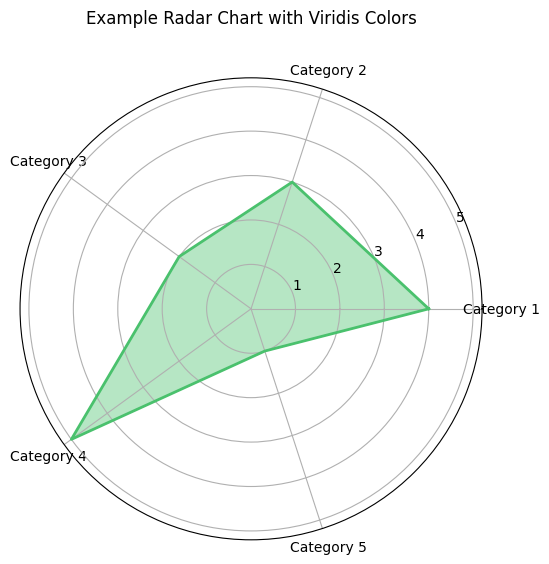

In [43]:


# Example usage
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
values = [4, 3, 2, 5, 1]
radar_plot(categories, values, title='Example Radar Chart with Viridis Colors')
